# Project 2

**About Dataset**

This comprehensive synthetic dataset of medicines includes 50,000 unique entries, meticulously crafted for modern pharmaceutical research. Each data point features realistic medicine names, categories, dosage forms, strengths, manufacturers, indications, and classifications (Prescription or Over-the-Counter).This dataset belongs to a retail pharmacy called Phama Lu

Problem: Lately the pharmacy has been having issues with students mistakely giving the patients prescription medicines instead of over the counter medicine. The pharmacy would like to have a dispensing system that can notify a anyone dispensing medication if they are dispensing a prescription medicine to avoid any errors being made. Students will use the dispensing system to dispense medication.


A machine learning model will be created that will consider the features of a medicine (e.g., Category, Dosage Form, Strength, Manufacturer), predict whether it is a Prescription or Over-the-Counter medication.

**Data description**

Columns:

Name: The synthetic name of the medicine, generated using a combination of prefixes and suffixes commonly found in drug names.

Category: The therapeutic category or class of the medicine (e.g., Antibiotic, Analgesic, Antipyretic).

Dosage Form: The form in which the medicine is administered (e.g., Tablet, Capsule, Injection).

Strength: The strength or concentration of the active ingredient in the medicine, expressed in milligrams (mg).

Manufacturer: The pharmaceutical company that manufactures the medicine.

Indication: The medical condition or purpose for which the medicine is used (e.g., Infection, Pain, Fever).

Classification: Indicates whether the medicine is available by prescription or over-the-counter.


In [1]:
#Import libraries (pandas, numpy, matplotlib, seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
medicine = pd.read_csv('/content/medicine_dataset.csv')

# **Data cleaning**

Checking if there is nay missing data in the dataset

In [2]:
#Check for Missing Values

print("Missing Values:\n", medicine.isnull().sum())


Missing Values:
 Name              0
Category          0
Dosage Form       0
Strength          0
Manufacturer      0
Indication        0
Classification    0
dtype: int64


**THERE ARE NO MISSING VALUES**

In [3]:
 #Check for Duplicate Rows
medicine_clean = medicine.drop_duplicates()
print("Number of duplicate rows:", medicine_clean.duplicated().sum())


Number of duplicate rows: 0


**THERE ARE NO DUPLICATE ROWS**

In [4]:
# Print the cleaned DataFrame
print(medicine_clean.head())

           Name      Category Dosage Form Strength  \
0   Acetocillin  Antidiabetic       Cream   938 mg   
1  Ibuprocillin     Antiviral   Injection   337 mg   
2    Dextrophen    Antibiotic    Ointment   333 mg   
3   Clarinazole    Antifungal       Syrup   362 mg   
4   Amoxicillin    Antifungal      Tablet   802 mg   

                          Manufacturer Indication    Classification  
0                     Roche Holding AG      Virus  Over-the-Counter  
1                          CSL Limited  Infection  Over-the-Counter  
2                    Johnson & Johnson      Wound      Prescription  
3                          AbbVie Inc.       Pain      Prescription  
4  Teva Pharmaceutical Industries Ltd.      Wound  Over-the-Counter  


# Data Exploration:

Import libraries (pandas, numpy, matplotlib, seaborn)
Read the CSV data into a pandas DataFrame
Check data types, missing values, and basic statistics
Clean and pre-process data (handling missing values, outliers, categorical features)

In [5]:
medicine_clean.head()

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,Acetocillin,Antidiabetic,Cream,938 mg,Roche Holding AG,Virus,Over-the-Counter
1,Ibuprocillin,Antiviral,Injection,337 mg,CSL Limited,Infection,Over-the-Counter
2,Dextrophen,Antibiotic,Ointment,333 mg,Johnson & Johnson,Wound,Prescription
3,Clarinazole,Antifungal,Syrup,362 mg,AbbVie Inc.,Pain,Prescription
4,Amoxicillin,Antifungal,Tablet,802 mg,Teva Pharmaceutical Industries Ltd.,Wound,Over-the-Counter


**Data types and structure of my database**

In [6]:
#A quick overview of the structure and data types within your DataFrame, which is useful for data cleaning, exploration, and analysis
medicine_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            50000 non-null  object
 1   Category        50000 non-null  object
 2   Dosage Form     50000 non-null  object
 3   Strength        50000 non-null  object
 4   Manufacturer    50000 non-null  object
 5   Indication      50000 non-null  object
 6   Classification  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


Checking data types

In [7]:
#Check data types, missing values, and basic statistics
medicine_clean

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,Acetocillin,Antidiabetic,Cream,938 mg,Roche Holding AG,Virus,Over-the-Counter
1,Ibuprocillin,Antiviral,Injection,337 mg,CSL Limited,Infection,Over-the-Counter
2,Dextrophen,Antibiotic,Ointment,333 mg,Johnson & Johnson,Wound,Prescription
3,Clarinazole,Antifungal,Syrup,362 mg,AbbVie Inc.,Pain,Prescription
4,Amoxicillin,Antifungal,Tablet,802 mg,Teva Pharmaceutical Industries Ltd.,Wound,Over-the-Counter
...,...,...,...,...,...,...,...
49995,Dextronazole,Analgesic,Ointment,405 mg,Eli Lilly and Company,Pain,Over-the-Counter
49996,Ibuprophen,Antiseptic,Tablet,633 mg,CSL Limited,Pain,Prescription
49997,Dextrovir,Antibiotic,Injection,327 mg,"Gilead Sciences, Inc.",Fever,Over-the-Counter
49998,Dextrostatin,Antibiotic,Inhaler,885 mg,AbbVie Inc.,Wound,Over-the-Counter


In [8]:
#shows the first 10 rows of the data
medicine_clean.head(10)

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,Acetocillin,Antidiabetic,Cream,938 mg,Roche Holding AG,Virus,Over-the-Counter
1,Ibuprocillin,Antiviral,Injection,337 mg,CSL Limited,Infection,Over-the-Counter
2,Dextrophen,Antibiotic,Ointment,333 mg,Johnson & Johnson,Wound,Prescription
3,Clarinazole,Antifungal,Syrup,362 mg,AbbVie Inc.,Pain,Prescription
4,Amoxicillin,Antifungal,Tablet,802 mg,Teva Pharmaceutical Industries Ltd.,Wound,Over-the-Counter
5,Ibupromycin,Antibiotic,Injection,140 mg,Takeda Pharmaceutical Company Limited,Infection,Prescription
6,Metovir,Antipyretic,Ointment,641 mg,Takeda Pharmaceutical Company Limited,Infection,Over-the-Counter
7,Ibuprovir,Antidepressant,Syrup,758 mg,Eli Lilly and Company,Fungus,Over-the-Counter
8,Cefcillin,Antipyretic,Tablet,954 mg,Takeda Pharmaceutical Company Limited,Fungus,Over-the-Counter
9,Acetomycin,Analgesic,Inhaler,838 mg,Novo Nordisk A/S,Wound,Prescription


Q2. Which dosage forms are most commonly used, and are there significant differences in their prevalence between prescription and over-the-counter medications?

# **Exploratory Data Analysis**

Q1. Which dosage form is more is prominant in the prescription vs over the counter category?

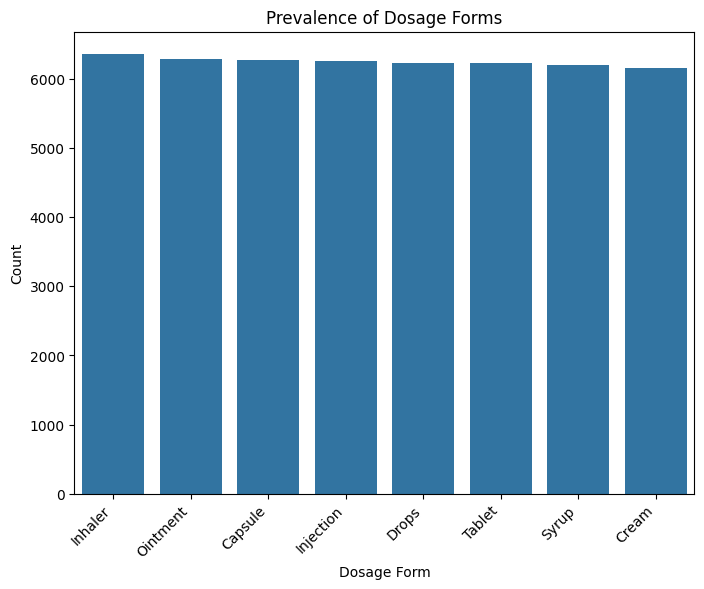

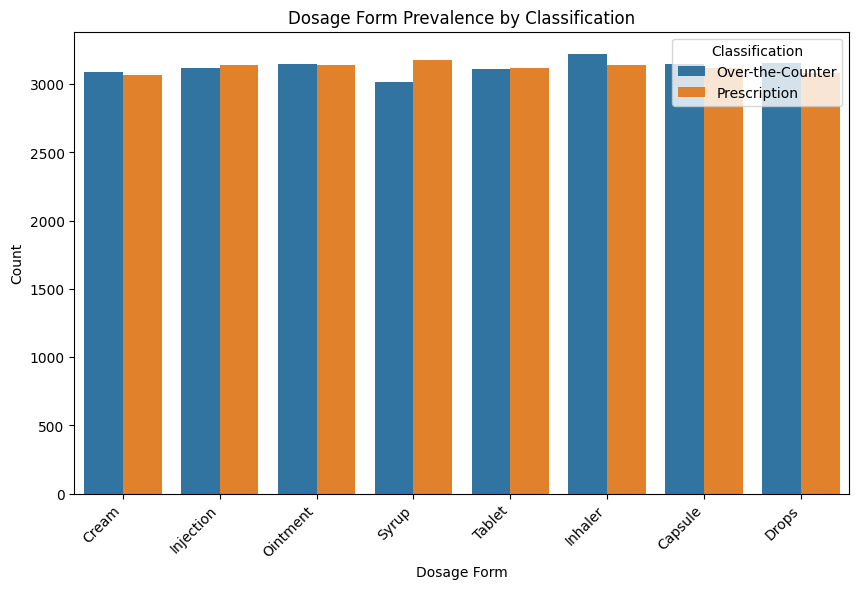

In [9]:
# **1. Dosage Form Prevalence**

plt.figure(figsize=(8, 6))
sns.countplot(x='Dosage Form', data=medicine, order=medicine['Dosage Form'].value_counts().index)
plt.title('Prevalence of Dosage Forms')
plt.xlabel('Dosage Form')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Comparing Dosage Form Prevalence between Prescription and Over-the-Counter
plt.figure(figsize=(10, 6))
sns.countplot(x='Dosage Form', hue='Classification', data=medicine)
plt.title('Dosage Form Prevalence by Classification')
plt.xlabel('Dosage Form')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classification')
plt.show()

There is a more significant difference in count with the syrup. More of the syrups were prescription as compared to over the counter. Inhalers and drops are mostly over the counter as compared to prescription.

**Q2:What are the top most used medications in prescription and over the counter?**

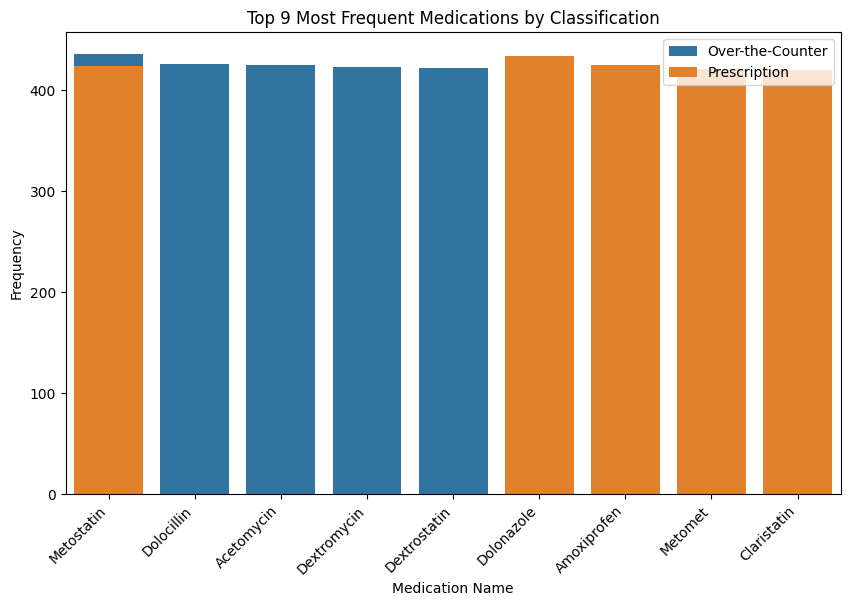

In [10]:
# 2. Top 9 Most Frequent Medications by Classification
plt.figure(figsize=(10, 6))
for classification in medicine_clean['Classification'].unique():
    top_5_meds = medicine_clean[medicine_clean['Classification'] == classification]['Name'].value_counts().head(5).index
    sns.countplot(x='Name', data=medicine_clean[medicine_clean['Classification'] == classification],
                  order=top_5_meds, label=classification)
plt.title('Top 9 Most Frequent Medications by Classification')
plt.xlabel('Medication Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

  Dolocillin, Acetomycin, Dextromycin and desxtrostatin are the most used over the counter medicines whilst Dolonazole is the most used prescription medication.

  **Q3: What are the most frequent dosage forms in prescription vs over the counter?**



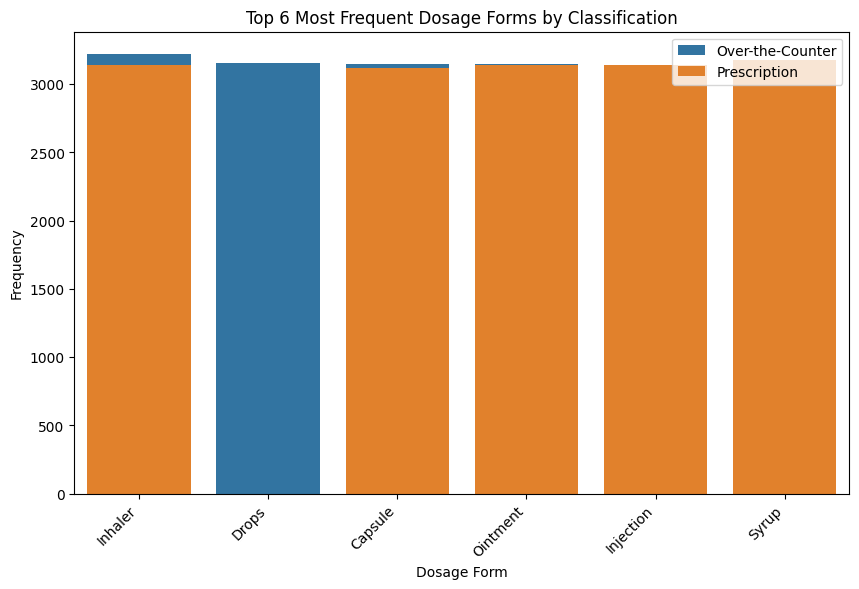

In [11]:
# 3. Top 5 Most Frequent Dosage Forms by Classification
plt.figure(figsize=(10, 6))
for classification in medicine_clean['Classification'].unique():
    top_5_forms = medicine_clean[medicine_clean['Classification'] == classification]['Dosage Form'].value_counts().head(5).index
    sns.countplot(x='Dosage Form', data=medicine_clean[medicine_clean['Classification'] == classification],
                  order=top_5_forms, label=classification)
plt.title('Top 6 Most Frequent Dosage Forms by Classification')
plt.xlabel('Dosage Form')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Drops are the most used dosage form for over he counter medicines, followed by inhaler and capsule. Syrup, injection, ointment are the most used for prescription medicine.

**Q4: What are the top 5 manufacturers for prescription medicine?**

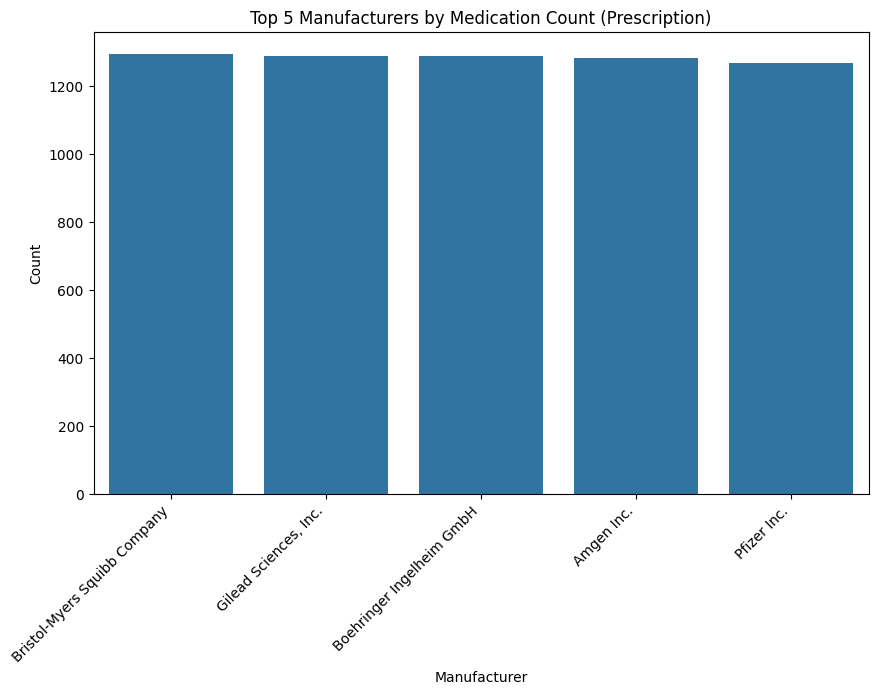

In [12]:
# 4.Top 5 Manufacturers by Medication Count for Prescription
plt.figure(figsize=(10, 6))
top_5_manufac_presc = medicine_clean[medicine_clean['Classification'] == 'Prescription']['Manufacturer'].value_counts().head(5).index
sns.countplot(x='Manufacturer', data=medicine_clean[medicine_clean['Classification'] == 'Prescription'],
              order=top_5_manufac_presc)
plt.title('Top 5 Manufacturers by Medication Count (Prescription)')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The top manufacturer for prescription medicine is Bristol-Myers Squibb Company which has a slightly higher count of medcicnes supplied from them as compared to the other manufacturers.

**Q5. Which category of medicines commonly falls under prescription medicine?**



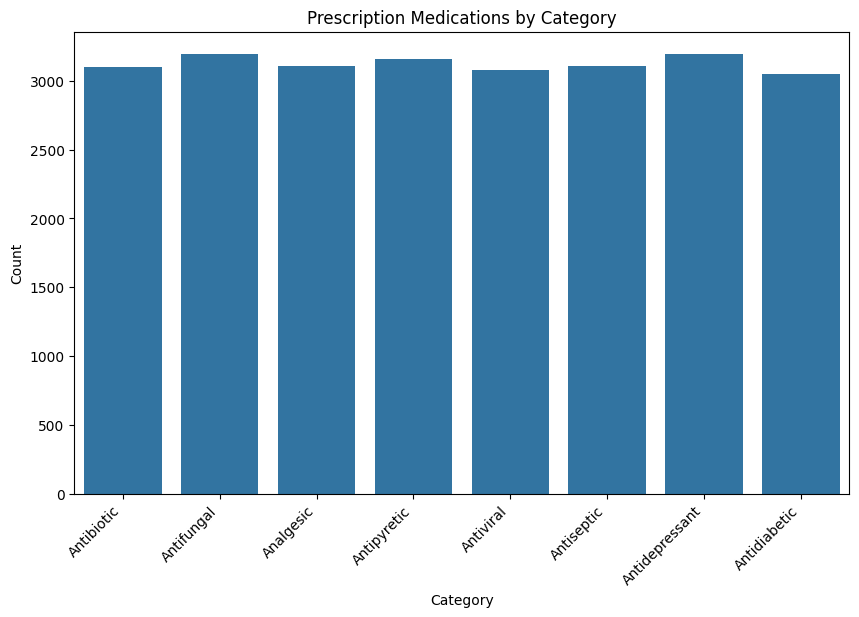

In [13]:
#5. Prescription Medications by Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=medicine_clean[medicine_clean['Classification'] == 'Prescription'])
plt.title('Prescription Medications by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Medicines that fall in the prrescription category are antibiotic, antifungal, analgesic, antipyretic, antivoral, antiseptic,antiviral, antiseptic antidepressents and antidiabetic. Antifungal. antiviral and antidepressent have the highest count.

Q6. What is the poportion of medicines are prescription vs over the counter?

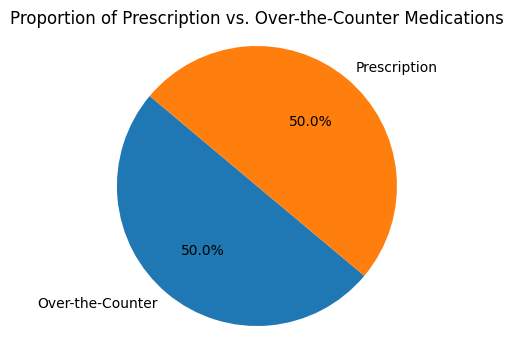

In [24]:
# 6. Proportion of Prescription Medications

# Calculate the counts of each classification
classification_counts = medicine_clean['Classification'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Prescription vs. Over-the-Counter Medications')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

There is an equal amount of prescription and over the counter medicines. This means that there is a 50% chance of the student picking a prescription or an over the counter medication.


 Q7. Is there evidence of market dominance by particular manufacturers?

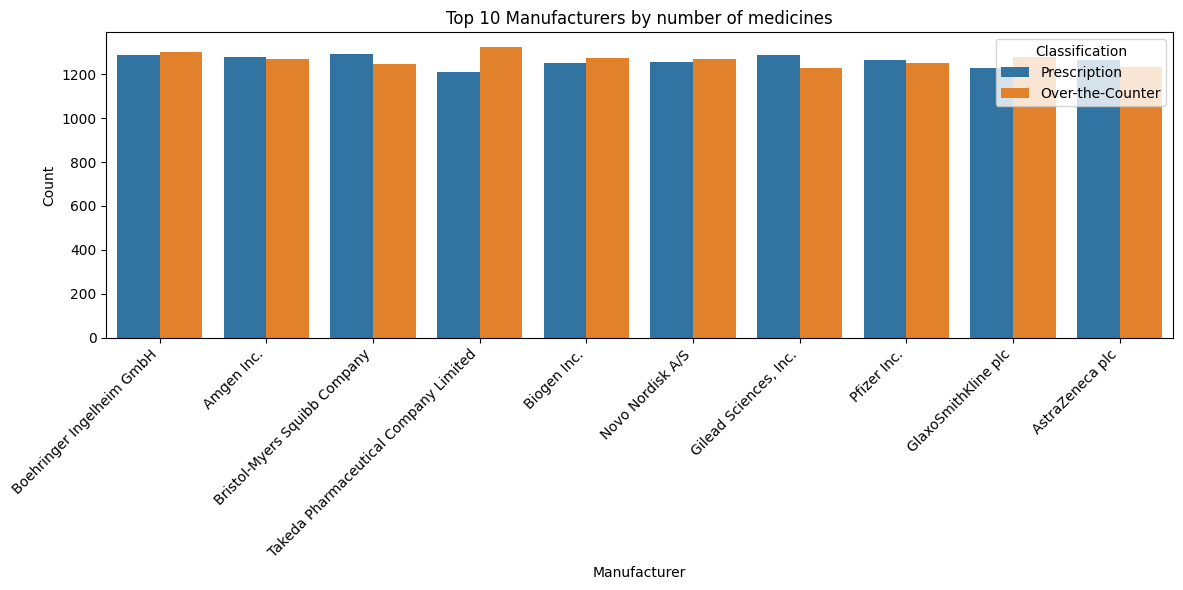

In [25]:
#7. Manufacturer Specialization**

# Get top 10 manufacturers
top_10_manufacturers = medicine_clean['Manufacturer'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 manufacturers
top_10_df =medicine_clean[medicine_clean['Manufacturer'].isin(top_10_manufacturers)]

# Create the bar plot with hue
plt.figure(figsize=(12, 6))
sns.countplot(x='Manufacturer', hue='Classification', data=top_10_df, order=top_10_manufacturers)
plt.title('Top 10 Manufacturers by number of medicines')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classification')
plt.tight_layout() #prevents labels from getting cutoff
plt.show()

All manufacturers have supplied an amount of medicine within a simillar range all above a count of 2500. Boehringeer Ingelheim GmbH had a slighlty higher count of medicine produced compared to evryone else. All the manufacturers hava similar amount of prescription vs over the counter.Tadeka pharmaceutical has a slightly higher over the counter which means if a medicined from Takeda parmaceutical is being dispensed then it my most likely be over the counter.

Q8. How does the distribution of manufacturers differ between prescription and over-the-counter medications?

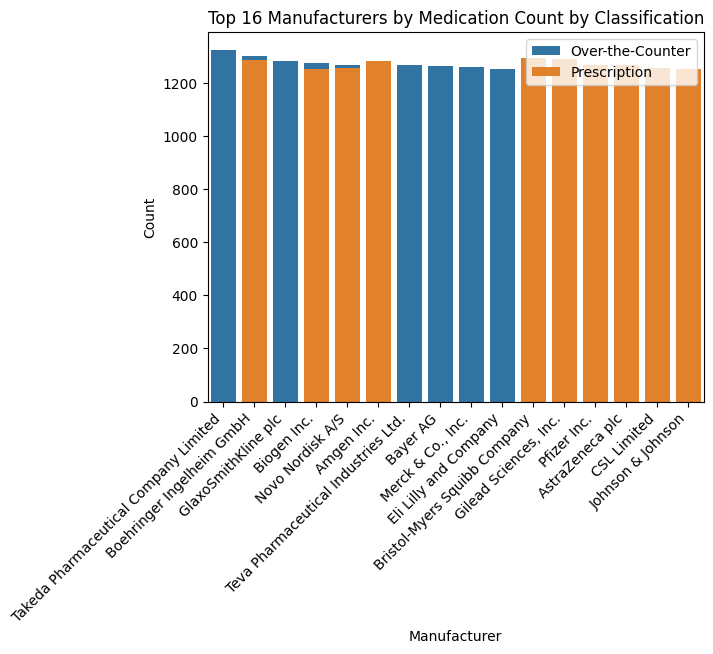

In [18]:
#8.**Visualization:** Manufacturer Distribution by Classification
for classification in medicine_clean['Classification'].unique():
    top_10_manufac = medicine_clean[medicine_clean['Classification'] == classification]['Manufacturer'].value_counts().head(10).index
    sns.countplot(x='Manufacturer', data=medicine_clean[medicine_clean['Classification'] == classification],
                  order=top_10_manufac, label=classification)
plt.title('Top 16 Manufacturers by Medication Count by Classification')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Amongst the top 10 62.5% of the manufacturers manufacture medicines that are prescription medicines. The count of medicines from all manufacturers are above 1200.Tadeka pharmaceutical company limited has the highest medicine count for over the counter medication.  There is not muvh diffference between amount of medicine from all manufacturers. The Which means it is possible to predict based on the manufacturer of the medicine wether the medicine is prescription or over the counter.

Q9. What is the top 10 most frequent medication categories and classification of prescription or over the counter?

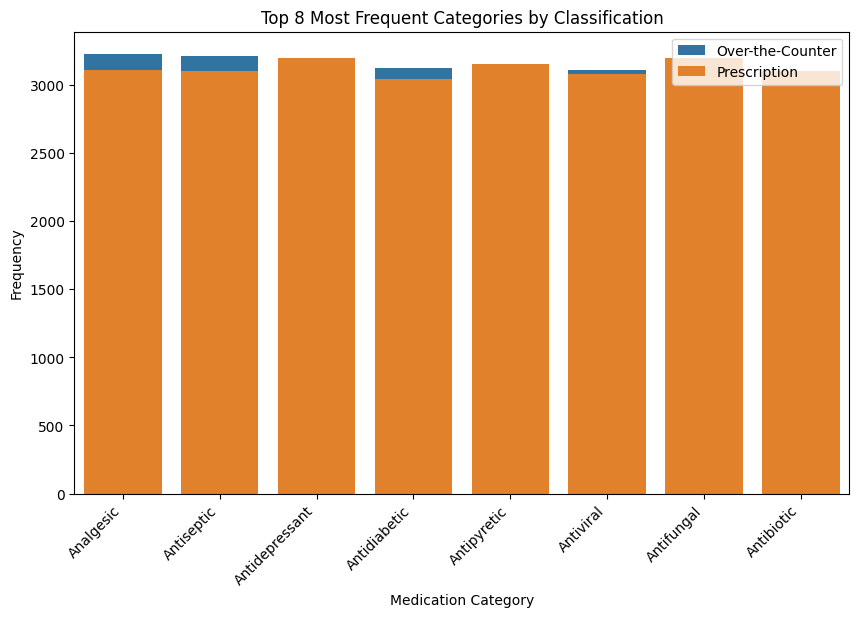

In [19]:
#9. Top 10 Most Frequent Categories by Classification
plt.figure(figsize=(10, 6))
for classification in medicine_clean['Classification'].unique():
    top_10_cats = medicine_clean[medicine_clean['Classification'] == classification]['Category'].value_counts().head(10).index
    sns.countplot(x='Category', data=medicine_clean[medicine_clean['Classification'] == classification],
                  order=top_10_cats, label=classification)
plt.title('Top 8 Most Frequent Categories by Classification')
plt.xlabel('Medication Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Most of the top 8 frequent medications which are analgesics, antibiotic, antiseptic, antidepressants, antidiabetic, antipyretic, antiviral and antifungal are prescription medicines

Q9:Do certain manufacturers specialize in specific types of medications?

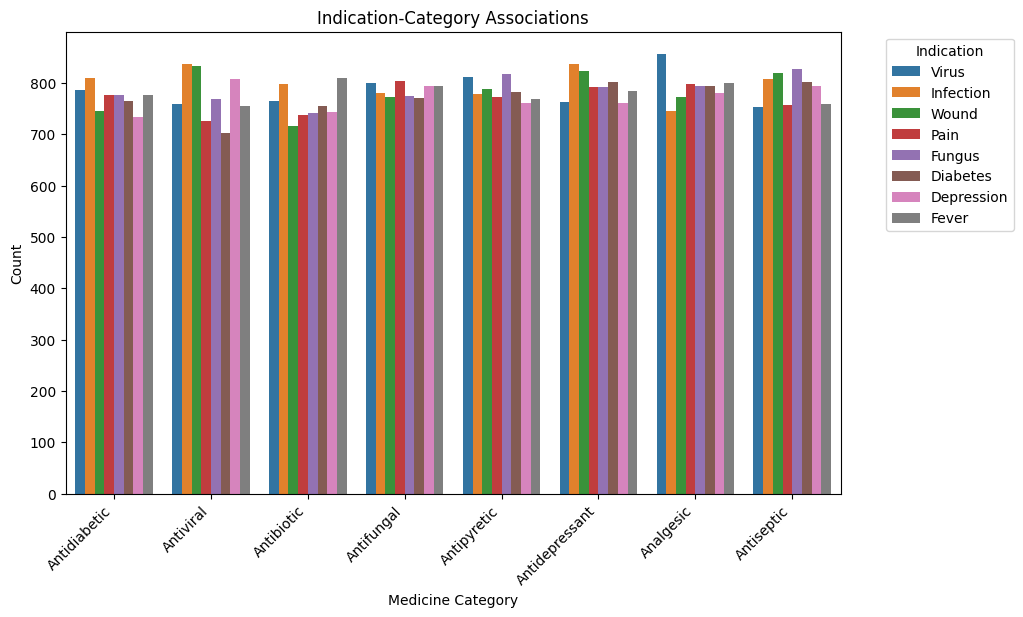

In [20]:
#9. Indication-Category Association

plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Indication', data=medicine_clean)
plt.title('Indication-Category Associations')
plt.xlabel('Medicine Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Indication', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The prescription medicines that are most frequently dispensed are analgesic, antiseptic,antidepressant, antidiabetic, antiviral, antifungal and antibiotic. Analgesics given for have the highest count which means they are dispensed the most especially for viruses.Antivirals have the second highest count for being given for infections and wound

Q10. How does the frequency of individual medications differ between prescription and over-the-counter classifications?

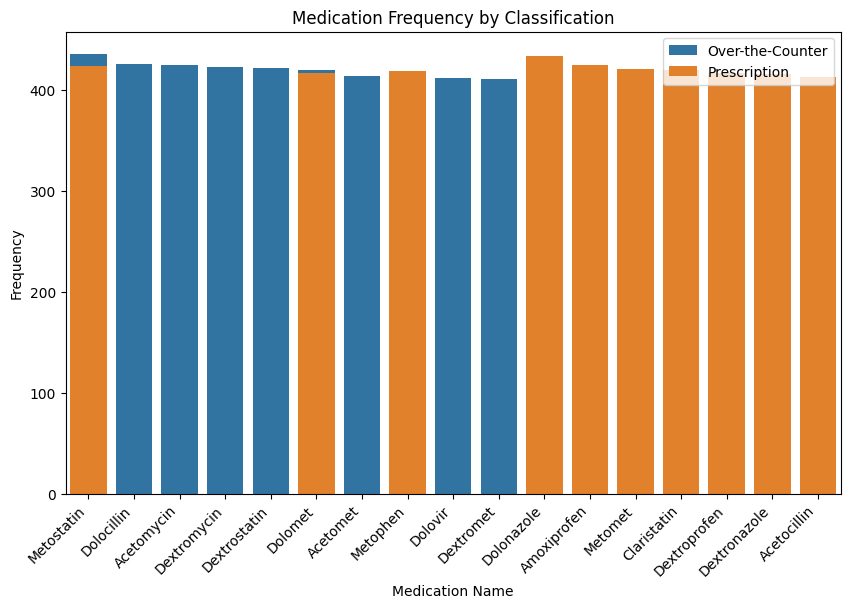

In [21]:
#10 Visualization: Medication Frequency by Classification
plt.figure(figsize=(10, 6))
for classification in medicine_clean['Classification'].unique():
    top_10_meds = medicine_clean[medicine_clean['Classification'] == classification]['Name'].value_counts().head(10).index
    sns.countplot(x='Name', data=medicine_clean[medicine_clean['Classification'] == classification],
                  order=top_10_meds, label=classification)
plt.title('Medication Frequency by Classification')
plt.xlabel('Medication Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

10 of the medicine in the graph are prescription medicines except for Metostatin and Dolomet which can be either prescription or Metostatin and Dolomet are most frequuently given as a over the counter medicine.However Whereas only 7 medicines are over the counter. All medicines have a frequency above 400 with Dolanozole and Metostatin have the highest frequency.

# **Machine learning model**

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/medicine_dataset.csv')

# Select relevant features
X = df[['Name', 'Category', 'Dosage Form', 'Manufacturer']]
y = df['Classification']

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X_encoded = X.copy()

# Encode categorical variables
le = LabelEncoder()
X_encoded['Name_encoded'] = le.fit_transform(X['Name'])
X_encoded['Category_encoded'] = le.fit_transform(X['Category'])
X_encoded['Dosage_Form_encoded'] = le.fit_transform(X['Dosage Form'])
X_encoded['Manufacturer_encoded'] = le.fit_transform(X['Manufacturer'])

# Drop original categorical columns
X_encoded = X_encoded.drop(['Name', 'Category', 'Dosage Form', 'Manufacturer'], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Example: Predict classification for a new medication
new_medication = {'Name_encoded': 10, 'Category_encoded': 5, 'Dosage_Form_encoded': 2, 'Manufacturer_encoded': 3}
predicted_classification = model.predict([list(new_medication.values())])[0]
print(f"Predicted Classification: {predicted_classification}")

Accuracy: 0.4932
                  precision    recall  f1-score   support

Over-the-Counter       0.49      0.48      0.49      4982
    Prescription       0.50      0.50      0.50      5018

        accuracy                           0.49     10000
       macro avg       0.49      0.49      0.49     10000
    weighted avg       0.49      0.49      0.49     10000

Predicted Classification: Over-the-Counter


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('/content/medicine_dataset.csv')

# Select relevant features
X = df[['Name', 'Category', 'Dosage Form', 'Manufacturer']]
y = df['Classification']

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X_encoded = X.copy()

# Encode categorical variables
le = LabelEncoder()
X_encoded['Name_encoded'] = le.fit_transform(X['Name'])
X_encoded['Category_encoded'] = le.fit_transform(X['Category'])
X_encoded['Dosage_Form_encoded'] = le.fit_transform(X['Dosage Form'])
X_encoded['Manufacturer_encoded'] = le.fit_transform(X['Manufacturer'])

# Drop original categorical columns
X_encoded = X_encoded.drop(['Name', 'Category', 'Dosage Form', 'Manufacturer'], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                          cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Example: Predict classification for a new medication
new_medication = {'Name_encoded': 10, 'Category_encoded': 5, 'Dosage_Form_encoded': 2, 'Manufacturer_encoded': 3}
predicted_classification = best_model.predict([list(new_medication.values())])[0]
print(f"Predicted Classification: {predicted_classification}")


Accuracy: 0.4924
                  precision    recall  f1-score   support

Over-the-Counter       0.49      0.49      0.49      4982
    Prescription       0.49      0.50      0.50      5018

        accuracy                           0.49     10000
       macro avg       0.49      0.49      0.49     10000
    weighted avg       0.49      0.49      0.49     10000

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Predicted Classification: Over-the-Counter


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
